### import lybraries

In [29]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [30]:
df=pd.read_csv('CarPrice_Assignment.csv')

In [31]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [32]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [34]:
df.shape

(205, 26)

In [35]:
df['CarName'].value_counts()

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

In [36]:
df.duplicated().value_counts()

False    205
Name: count, dtype: int64

## we can drop names because unique id is represnt names

In [37]:
df.drop('CarName',axis=1,inplace=True)

In [38]:
df['fueltype'].value_counts()

fueltype
gas       185
diesel     20
Name: count, dtype: int64

In [39]:
df.loc[df['fueltype']=="gas",'fueltype']=1
df.loc[df['fueltype']=="diesel",'fueltype']=0


In [40]:
df['aspiration'].value_counts()

aspiration
std      168
turbo     37
Name: count, dtype: int64

In [41]:
df.loc[df['aspiration']=="std",'aspiration']=1
df.loc[df['aspiration']=="turbo",'aspiration']=0

In [42]:
df['doornumber'].value_counts()

doornumber
four    115
two      90
Name: count, dtype: int64

In [43]:
df.loc[df['doornumber']=="four",'doornumber']=4
df.loc[df['doornumber']=="two",'doornumber']=2

In [44]:
df['carbody'].value_counts()

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64

In [45]:
df.loc[df['carbody']=="sedan",'carbody']=4
df.loc[df['carbody']=="hatchback",'carbody']=3
df.loc[df['carbody']=="wagon",'carbody']=2
df.loc[df['carbody']=="hardtop",'carbody']=1
df.loc[df['carbody']=="convertible",'carbody']=0

In [46]:
df['drivewheel'].value_counts()

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64

In [47]:
df.loc[df['drivewheel']=="fwd",'drivewheel']=2
df.loc[df['drivewheel']=="rwd",'drivewheel']=1
df.loc[df['drivewheel']=="4wd",'drivewheel']=0

In [48]:
df['enginelocation'].value_counts()

enginelocation
front    202
rear       3
Name: count, dtype: int64

In [49]:
df.loc[df['enginelocation']=="front",'enginelocation']=1
df.loc[df['enginelocation']=="rear",'enginelocation']=0

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [51]:
df['enginetype'].value_counts()

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64

In [52]:
df.loc[df['enginetype']=="ohc",'enginetype']=6
df.loc[df['enginetype']=="ohcf",'enginetype']=5
df.loc[df['enginetype']=="ohcv",'enginetype']=4
df.loc[df['enginetype']=="dohc",'enginetype']=3
df.loc[df['enginetype']=="l",'enginetype']=2
df.loc[df['enginetype']=="rotor",'enginetype']=1
df.loc[df['enginetype']=="dohcv",'enginetype']=0

In [53]:
df['cylindernumber'].value_counts()

cylindernumber
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: count, dtype: int64

In [54]:
df.loc[df['cylindernumber']=="twelve",'cylindernumber']=11
df.loc[df['cylindernumber']=="three",'cylindernumber']=3
df.loc[df['cylindernumber']=="two",'cylindernumber']=2
df.loc[df['cylindernumber']=="eight",'cylindernumber']=8
df.loc[df['cylindernumber']=="five",'cylindernumber']=5
df.loc[df['cylindernumber']=="six",'cylindernumber']=6
df.loc[df['cylindernumber']=="four",'cylindernumber']=4

In [55]:
df['fuelsystem'].value_counts()

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64

In [56]:
df.loc[df['fuelsystem']=="mpfi",'fuelsystem']=7
df.loc[df['fuelsystem']=="2bbl",'fuelsystem']=6
df.loc[df['fuelsystem']=="idi",'fuelsystem']=5
df.loc[df['fuelsystem']=="1bbl",'fuelsystem']=1
df.loc[df['fuelsystem']=="spfi",'fuelsystem']=0

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [58]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def convert_non_numeric_to_numeric(df):
    """
    Convert non-numeric columns in a DataFrame to numeric using Label Encoding for categorical data.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame
    
    Returns:
    pd.DataFrame: The DataFrame with all non-numeric columns converted to numeric
    """
    label_encoders = {}
    for column in df.columns:
        if df[column].dtype == 'object':  # Check if column is non-numeric (i.e., object type)
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column].astype(str))  # Convert to string to handle any non-string objects
            label_encoders[column] = le  # Store the label encoder for reference
    
    return df, label_encoders

# Example usage


In [59]:
df, encoders = convert_non_numeric_to_numeric(df)


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    int32  
 3   aspiration        205 non-null    int32  
 4   doornumber        205 non-null    int32  
 5   carbody           205 non-null    int32  
 6   drivewheel        205 non-null    int32  
 7   enginelocation    205 non-null    int32  
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    int32  
 14  cylindernumber    205 non-null    int32  
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    int32  
 1

In [61]:
df.isnull().sum()

car_ID              0
symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

### doing eda

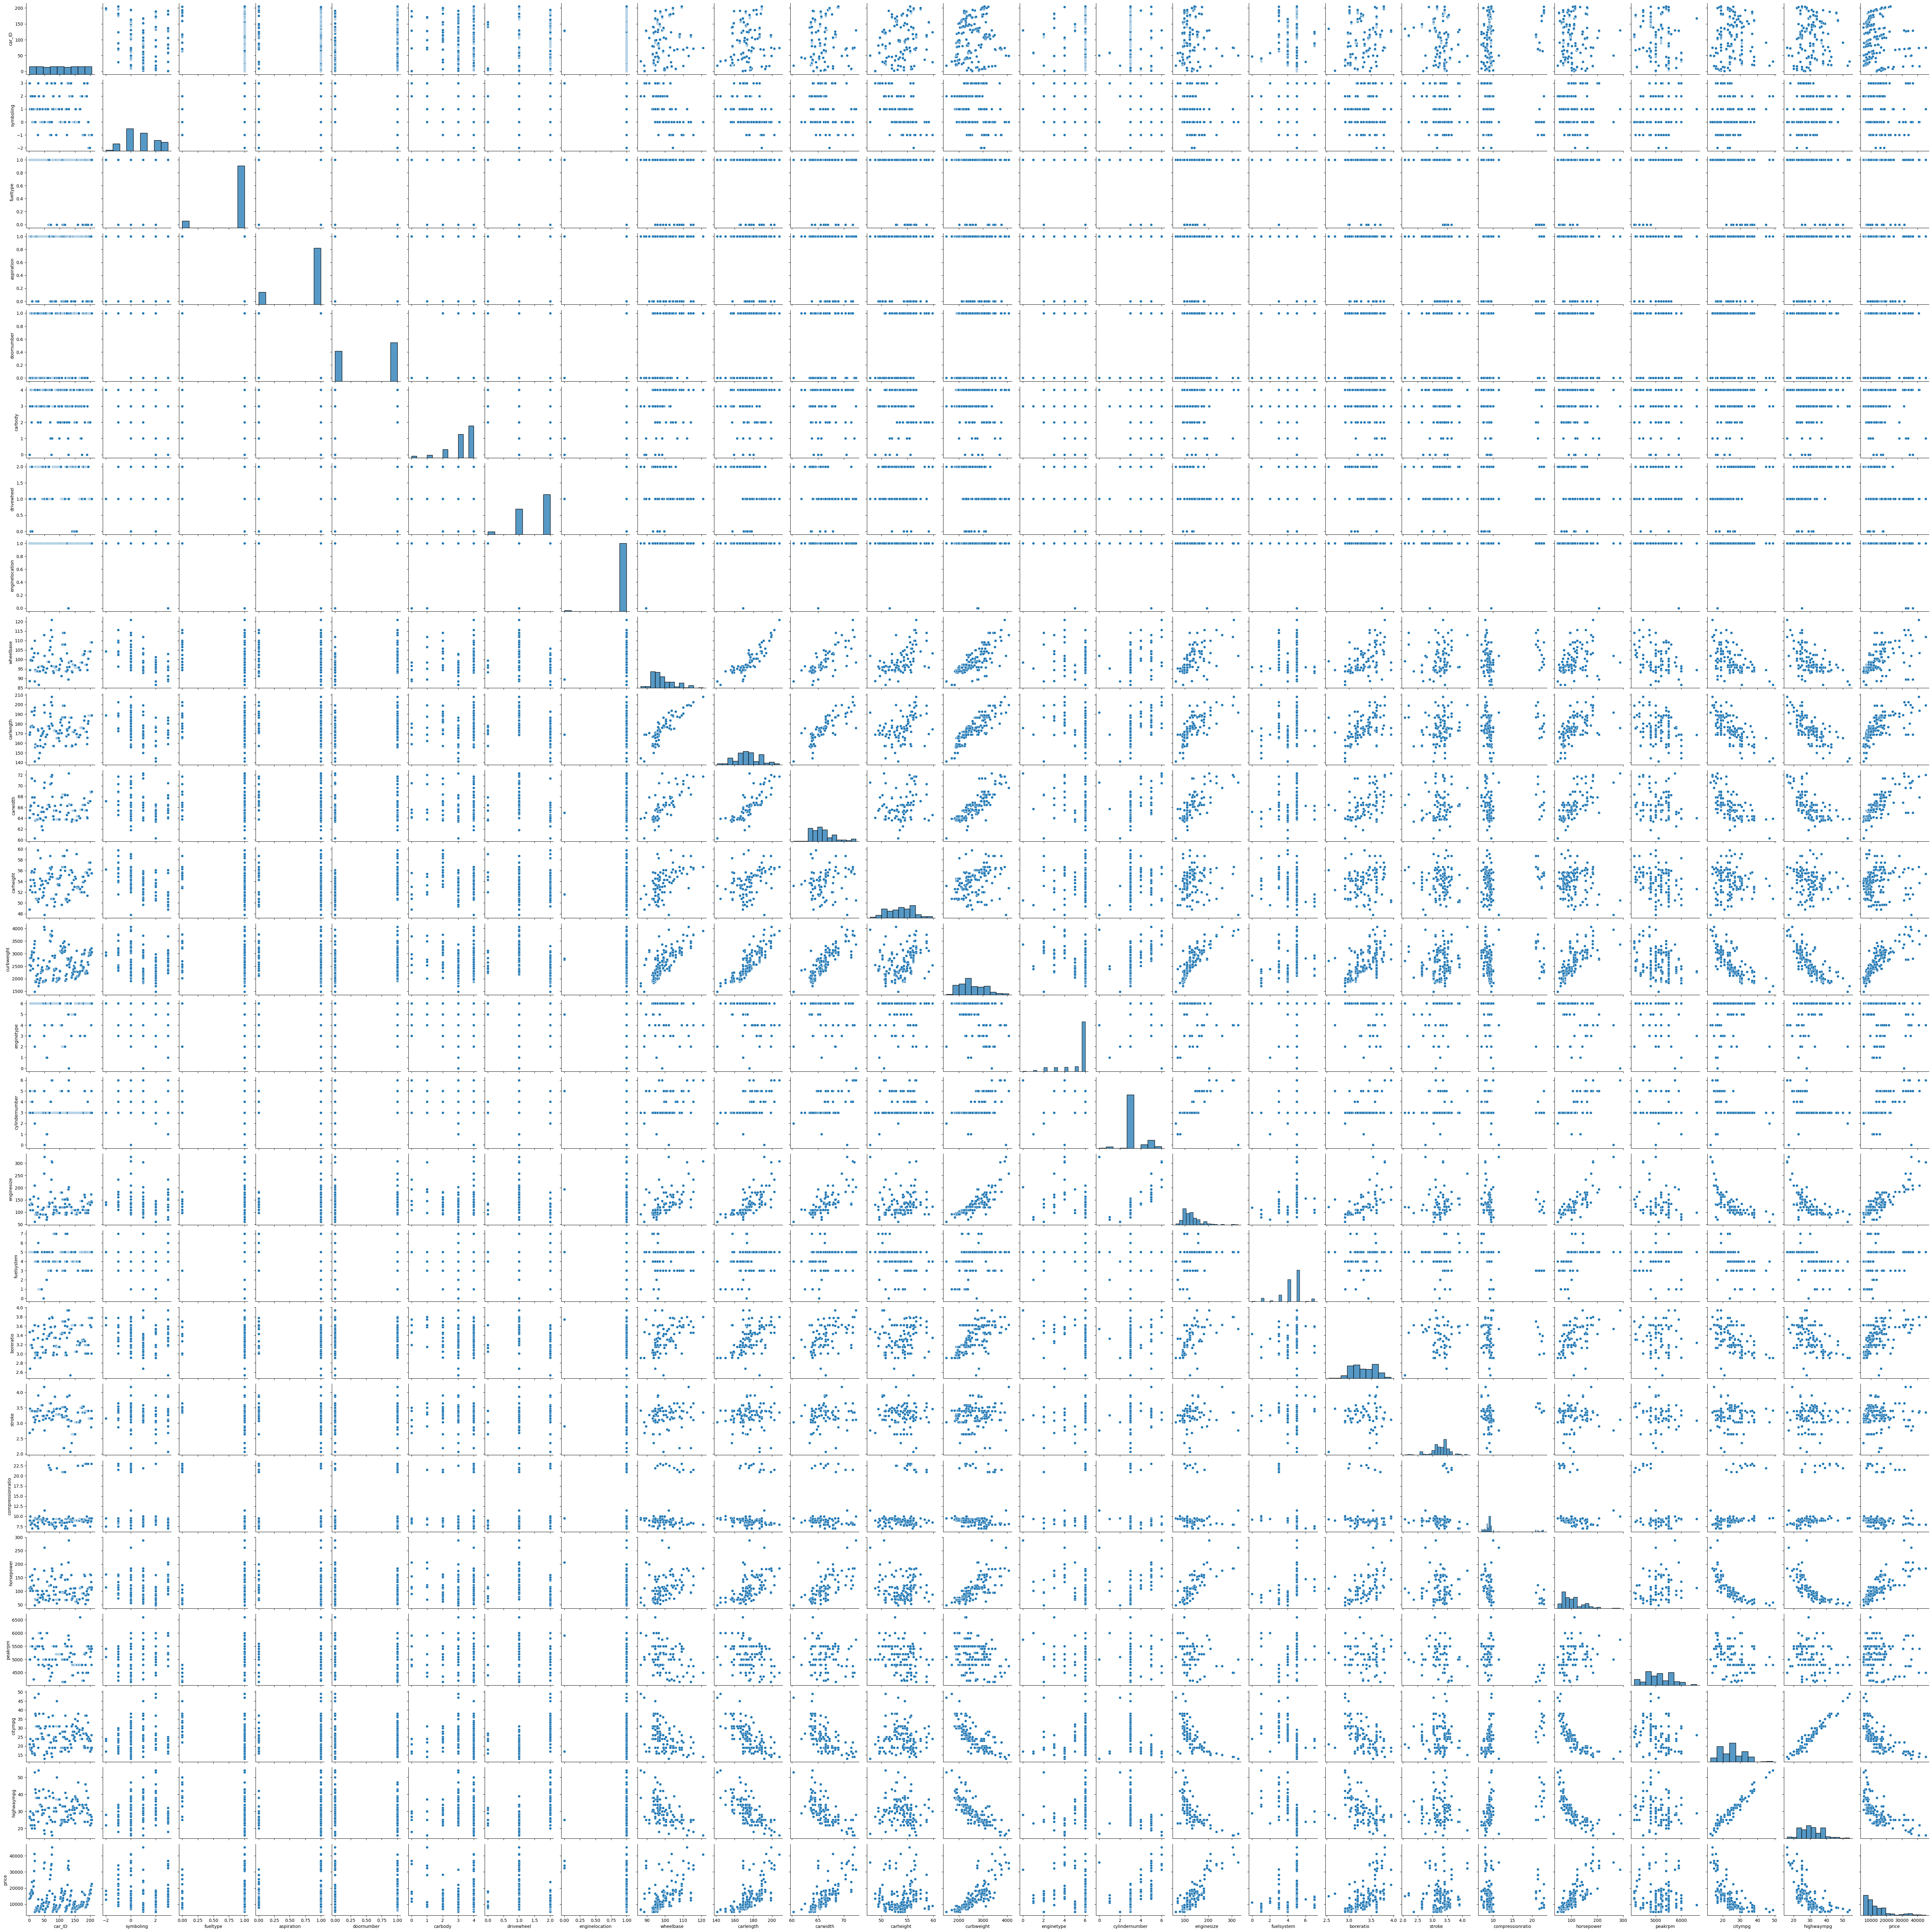

In [62]:
sns.pairplot(df)


array([[<Axes: title={'center': 'car_ID'}>,
        <Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'fueltype'}>,
        <Axes: title={'center': 'aspiration'}>,
        <Axes: title={'center': 'doornumber'}>],
       [<Axes: title={'center': 'carbody'}>,
        <Axes: title={'center': 'drivewheel'}>,
        <Axes: title={'center': 'enginelocation'}>,
        <Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>],
       [<Axes: title={'center': 'carwidth'}>,
        <Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginetype'}>,
        <Axes: title={'center': 'cylindernumber'}>],
       [<Axes: title={'center': 'enginesize'}>,
        <Axes: title={'center': 'fuelsystem'}>,
        <Axes: title={'center': 'boreratio'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compressionratio'}>],
       [<Axes: title={'center': 'horsepowe

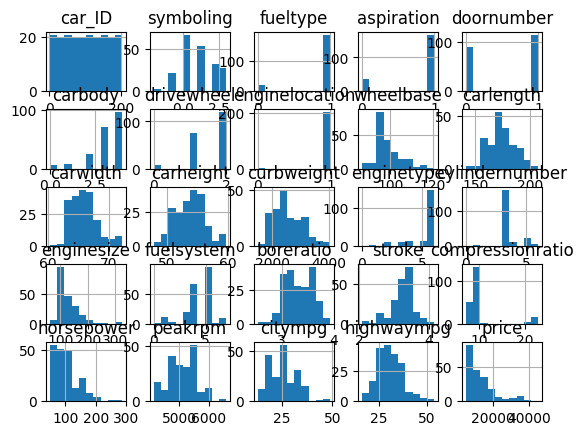

In [63]:
df.hist()

<Axes: >

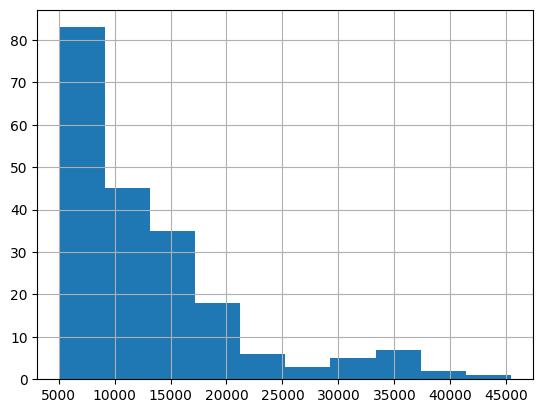

In [64]:
df['price'].hist()

In [65]:
df.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

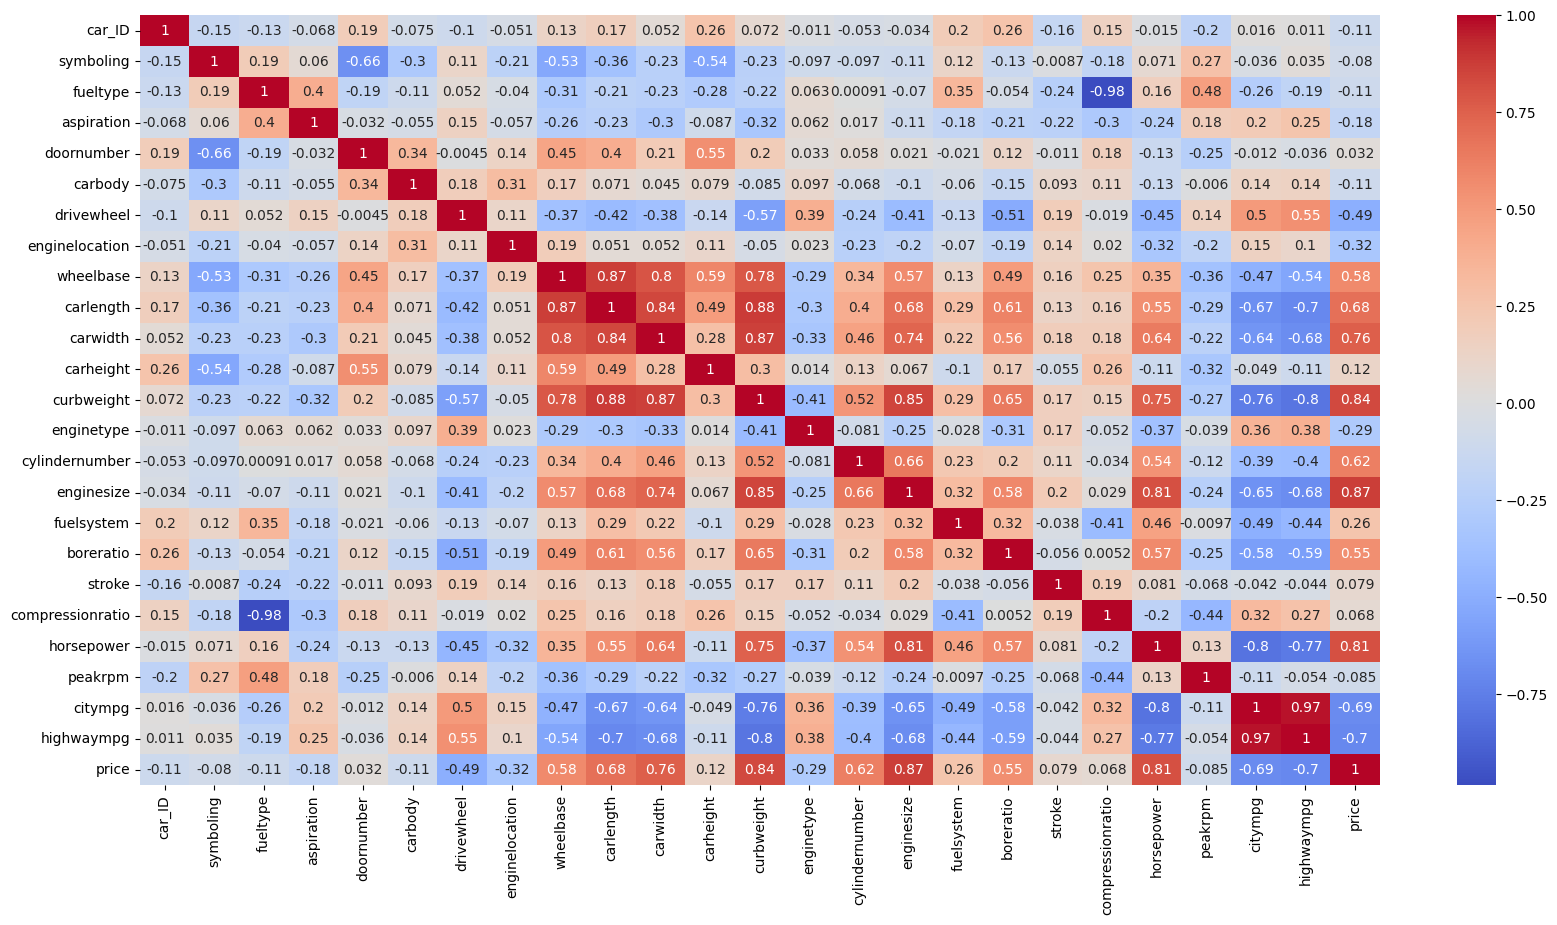

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
plt.show()


In [67]:
df.drop('fueltype',axis=1,inplace=True)

In [68]:
import statsmodels.formula.api as sm

# Assuming df_scaled is your DataFrame and 'MEDV' is your dependent variable
# and all other columns are your independent variables

# Define the model string
model_str = 'price ~ ' + ' + '.join(df.columns.difference(['price']))

# Fit the model
model = sm.ols(formula=model_str, data=df)
result = model.fit()

# Print the regression results
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     68.44
Date:                Sat, 14 Sep 2024   Prob (F-statistic):           9.25e-77
Time:                        21:43:54   Log-Likelihood:                -1899.6
No. Observations:                 205   AIC:                             3847.
Df Residuals:                     181   BIC:                             3927.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.542e+04   1.41e+04  

In [69]:
df.drop(['aspiration','boreratio','carbody','carheight','carlength','citympg','curbweight'],axis=1,inplace=True)

### all data code so deploy model

In [70]:
from sklearn.model_selection import train_test_split
x=df.drop('price',axis=1)
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"mean squar error > {mse}\n r2 score > {r2}")

mean squar error > 11029309.406990563
 r2 score > 0.8602894901463957


In [71]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"mean squar error > {mse}\n r2 score > {r2}")

mean squar error > 2980581.0639876598
 r2 score > 0.9622443722681511


In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [73]:
x=df.drop('price',axis=1)
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)
odel = Sequential([
    Dense(180, activation='linear', input_shape=(x_train.shape[1],)),
    Dense(90, activation='linear'),
    Dense(45, activation='linear'),
    Dense(1, activation='softmax')
])

c:\Users\ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
import tensorflow as tf
odel.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=['r2_score'])

In [75]:
history = odel.fit(x_train, y_train, epochs=50)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"mean squar error > {mse}\n r2 score > {r2}")

Epoch 1/50


c:\Users\ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 219000960.0000 - r2_score: -3.3990
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 222870048.0000 - r2_score: -2.9526 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 275999328.0000 - r2_score: -2.7025 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 239935392.0000 - r2_score: -2.7821 
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 236627840.0000 - r2_score: -3.1763 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 240092528.0000 - r2_score: -2.9383 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 218771152.0000 - r2_score: -3.3500 
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 218787984.0000 - r2_score: -3.1282 
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 240384736.0000 - r2_score: -2.8903 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 246393008.0000 - r2_score: -2.7030 
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 236330880.0000 - r2_score: -2.8028

In [76]:
y_pred=odel.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print(f"mean squar error > {mse}\n r2 score > {r2}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
mean squar error > 260894290.77682653
 r2 score > -2.304801147315944


c:\Users\ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (32, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
